In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import seaborn as sns
# Load the Iris dataset
df = sns.load_dataset('iris')

In [20]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [22]:
df.drop('species',axis=1,inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
# Standardize the data (optional but recommended for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [25]:
# Elbow Method to find the optimal number of clusters
inertia = []  # Inertia is the sum of squared distances to the nearest cluster center

In [26]:
# Test different numbers of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

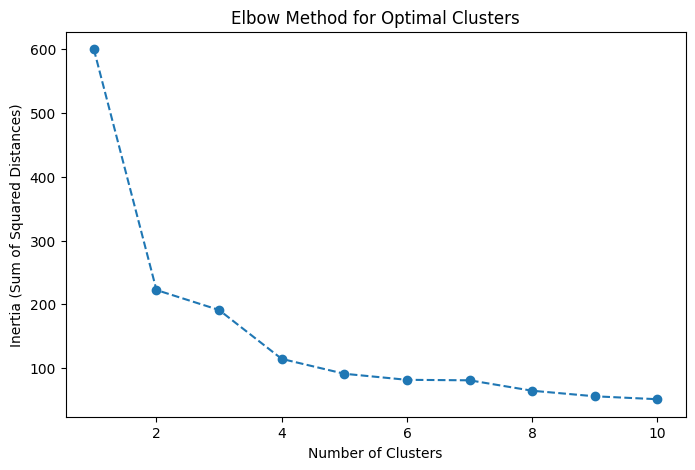

In [27]:
# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [28]:
# Choose the optimal number of clusters based on the elbow plot
# Here, let's assume the elbow occurs at k=3 (you'll need to inspect the plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original DataFrame
df["Cluster"] = kmeans.labels_

# Display the first few rows of the DataFrame with cluster labels
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width  Cluster
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        2
2           4.7          3.2           1.3          0.2        2
3           4.6          3.1           1.5          0.2        2
4           5.0          3.6           1.4          0.2        1
